In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [9]:

X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [10]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.982609,0.635969,1.790819,-0.111669,0.899305,1
1,-1.624008,-2.135206,-2.766693,-1.125768,-0.541264,0
2,-0.781102,-0.721414,0.877303,-1.382300,-0.987241,0
3,1.483702,-0.027780,-2.598707,-2.588149,-1.205997,0
4,1.710009,0.648460,1.368927,-0.298957,-0.860736,1


In [11]:

# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [12]:

# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [13]:

# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [14]:

df1 = combined_sampling(df,0.5,0.5)

<ipython-input-12-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:

df2 = combined_sampling(df,0.5,0.5)

<ipython-input-12-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:

df3 = combined_sampling(df,0.5,0.5)

<ipython-input-12-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [17]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col4', 'target'], dtype='object')
Index(['col5', 'col4', 'target'], dtype='object')
Index(['col5', 'col4', 'target'], dtype='object')


In [18]:
df3

,col5,col4,target
91,-0.216536,-1.622489,0
71,2.487632,1.830901,1
35,-0.938009,1.606398,0
17,4.371259,1.621104,1
5,-0.844472,-3.116012,0
80,-1.404271,-0.794380,0
47,3.012755,1.429488,1
0,0.899305,-0.111669,1
42,-1.147750,-0.245288,0
32,-1.391810,-0.942340,0


In [19]:

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [20]:

clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [21]:
from sklearn.tree import plot_tree

[Text(0.6666666666666666, 0.9375, 'X[0] <= -0.039\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.5, 0.8125, 'X[1] <= -0.122\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(0.3333333333333333, 0.6875, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.6666666666666666, 0.6875, 'X[0] <= -0.512\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.5, 0.5625, 'X[0] <= -2.019\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.3333333333333333, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.4375, 'X[1] <= 2.018\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.5, 0.3125, 'X[1] <= 0.641\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.3333333333333333, 0.1875, 'X[1] <= 0.457\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')

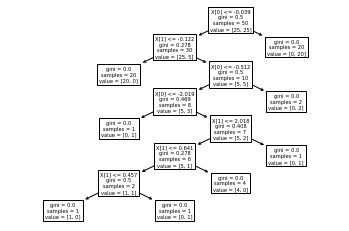

In [22]:
plot_tree(clf1)

[Text(0.4, 0.9285714285714286, 'X[1] <= -0.487\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2, 0.7857142857142857, 'X[0] <= 1.49\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.1, 0.6428571428571429, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.7857142857142857, 'X[0] <= -0.044\ngini = 0.367\nsamples = 33\nvalue = [8, 25]'),
 Text(0.5, 0.6428571428571429, 'X[0] <= -2.019\ngini = 0.494\nsamples = 18\nvalue = [8, 10]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.5, 'X[0] <= -0.708\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.4, 0.35714285714285715, 'X[1] <= 0.642\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.3, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.21428571428571427, 'X[1] <= 1.66\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.4, 0.07142857142857142, 'gini = 0.0\nsamples = 7\nvalue = [7, 

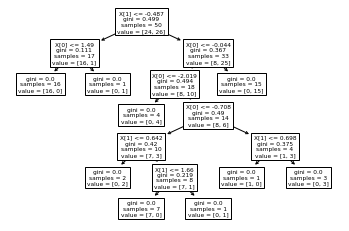

In [23]:
plot_tree(clf2)

[Text(0.5714285714285714, 0.9375, 'X[0] <= 0.406\ngini = 0.449\nsamples = 50\nvalue = [33, 17]'),
 Text(0.42857142857142855, 0.8125, 'X[1] <= 1.672\ngini = 0.26\nsamples = 39\nvalue = [33, 6]'),
 Text(0.2857142857142857, 0.6875, 'X[0] <= -2.299\ngini = 0.153\nsamples = 36\nvalue = [33, 3]'),
 Text(0.14285714285714285, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.42857142857142855, 0.5625, 'X[1] <= -0.366\ngini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.2857142857142857, 0.4375, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.5714285714285714, 0.4375, 'X[1] <= -0.298\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.42857142857142855, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7142857142857143, 0.3125, 'X[0] <= -1.286\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.5714285714285714, 0.1875, 'X[1] <= 0.721\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.42857142857142855, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Te

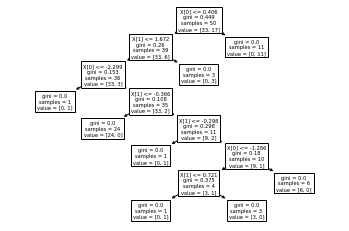

In [24]:

plot_tree(clf3)

In [25]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [27]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [28]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
97,0.926754,-0.552418,-0.818413,0.652545,0.005027,1
86,-0.093500,-1.796833,-3.734594,0.875589,1.750332,1
94,0.271512,-0.991631,-1.563438,-1.571972,-0.513645,0
63,-0.058706,-0.359248,-2.138103,-2.322827,-1.028184,0
70,2.029149,-2.822316,0.246253,2.541735,1.126170,1
26,1.868584,-0.215862,0.571985,0.815109,1.129532,1
82,0.831233,-0.736542,-0.152043,0.578611,-1.424836,1
30,-0.867296,-1.237439,-0.223263,-4.595557,0.113519,0
67,1.106551,-0.523276,-1.930189,0.651029,6.127169,1
93,-0.913247,-0.849236,-0.927510,-1.341830,-0.526004,0
